In [33]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from skimage.color import *
import cv2
from my_commonfunctions import *
from tqdm import trange

matplotlib.rcParams['figure.dpi'] = 200

In [70]:
def get_initial_contours_y(img_gray_uint8, kernel_size):
    # 1. Canny
    edges = cv2.Canny(img_gray_uint8, 100, 200)
    
    # 2. Closing
    k = np.ones(kernel_size)
    closed = my_close(edges, k)
    
    # 3. White pixels freq in each row
    closed_bin = closed > 200
    sum_of_rows = np.sum(closed_bin, axis=1) # Sum of each row
    img_width = img_gray_uint8.shape[1]
    is_line = (sum_of_rows / img_width) > 0.8 # Normalization & thresholding (If percentage of white pixels of each row is 80% or higher, this row is considered a line)
    
    # 4. Contours of is_line
    image, init_contours, hierarchy = cv2.findContours((is_line*255).astype(np.uint8), 
                                              cv2.RETR_TREE, 
                                              cv2.CHAIN_APPROX_SIMPLE)
    init_contours = np.array(init_contours).squeeze()
    init_contours_y = init_contours.T[1].T
    
    return init_contours_y.squeeze()


In [58]:
test3_gray = (rgb2gray(io.imread('test3.png')) * 255).astype(np.uint8)
test3_w1000_gray = (rgb2gray(io.imread('test3_w1000.png')) * 255).astype(np.uint8)
test3_w1300_gray = (rgb2gray(io.imread('test3_w1300.png')) * 255).astype(np.uint8)
test3_w2500_gray = (rgb2gray(io.imread('test3_w2500.png')) * 255).astype(np.uint8)
test4_gray = (rgb2gray(io.imread('test4.png')) * 255).astype(np.uint8)
test5_gray = (rgb2gray(io.imread('test5.png')) * 255).astype(np.uint8)
Beethoven_croped_gray = (rgb2gray(io.imread('Beethoven_Op026-01_001_croped.png'))).astype(np.uint8)
Beethoven_gray = (rgb2gray(io.imread('Beethoven_Op026-01_001.png'))).astype(np.uint8)

/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.
/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  
/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/

In [36]:
num_of_contours = []
print(get_initial_contours_y(test3_gray, (33, 33)))

[  0 215]


In [67]:
def get_k_min_k_max(img_gray_uint8):
    all_num_of_contours = []
    for kernel_size in trange(3, 513, 2):
        initial_contours_y = get_initial_contours_y(img_gray_uint8, (kernel_size, kernel_size))
        num_of_contours = 0
        if len(initial_contours_y.shape) == 2:
            num_of_contours = initial_contours_y.shape[0]
        else:
            num_of_contours = 1
        img_height = img_gray_uint8.shape[0]
        print(initial_contours_y.shape)
        if (num_of_contours == 1) and ((initial_contours_y[0] == 0) and (initial_contours_y[1] == img_height-1)):
            return all_num_of_contours
        all_num_of_contours.append(num_of_contours)
    return all_num_of_contours

In [71]:
get_k_min_k_max(test3_gray)

  0%|          | 0/255 [00:00<?, ?it/s]

(20, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(2, 2)
(2, 2)
(2, 2)
(2,)


[20, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2]

In [72]:
print(get_k_min_k_max(test3_w1000_gray))

  7%|▋         | 18/255 [00:00<00:01, 174.54it/s]

(20, 2)
(20, 2)
(20, 2)
(20, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)


 13%|█▎        | 32/255 [00:00<00:01, 147.47it/s]

(2, 2)
(2,)
[20, 20, 20, 20, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2]


In [53]:
print(get_k_min_k_max(test3_w1300_gray))

 16%|█▌        | 41/255 [00:00<00:02, 89.18it/s] 

[20, 20, 20, 20, 20, 16, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2]


In [54]:
print(get_k_min_k_max(test3_w2500_gray))

 33%|███▎      | 83/255 [00:04<00:09, 18.17it/s]

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [55]:
print(get_k_min_k_max(test4_gray))

  0%|          | 0/255 [00:00<?, ?it/s]

[10, 10, 10, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [56]:
print(get_k_min_k_max(test5_gray))

 19%|█▉        | 48/255 [00:00<00:00, 292.78it/s]

[5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [62]:
print(get_k_min_k_max(Beethoven_croped_gray))

  0%|          | 0/255 [00:00<?, ?it/s]

[10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [73]:
print(get_k_min_k_max(Beethoven_gray))

  4%|▍         | 10/255 [00:00<00:02, 91.76it/s]

(2, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(11, 2)
(10, 2)
(10, 2)
(8, 2)


 10%|█         | 26/255 [00:00<00:02, 81.53it/s]

(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(5, 2)
(5, 2)
(3, 2)
(3, 2)
(2,)
(2,)
(2,)
(2,)
(2,)


 15%|█▌        | 39/255 [00:00<00:03, 67.43it/s]

(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


 20%|██        | 51/255 [00:00<00:03, 53.36it/s]

(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


 24%|██▍       | 62/255 [00:01<00:03, 48.60it/s]

(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


 24%|██▍       | 62/255 [00:01<00:04, 46.38it/s]

(2,)
[2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 10, 10, 8, 6, 6, 6, 6, 6, 6, 5, 5, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


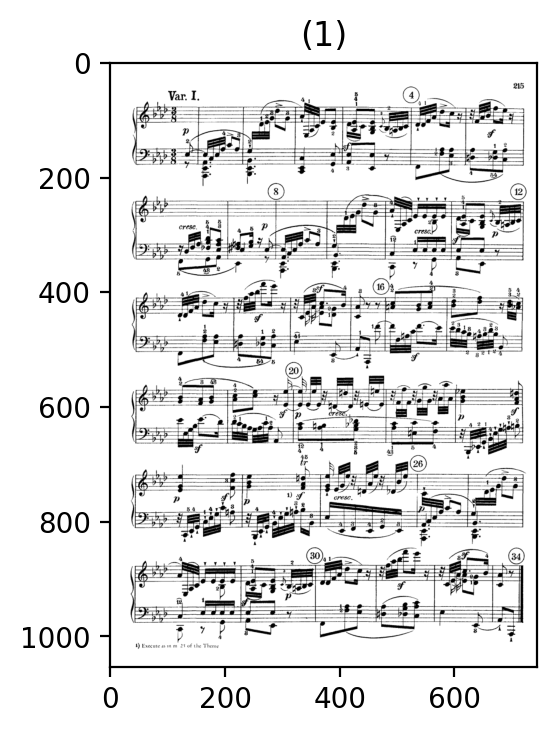

In [63]:
my_show_images([Beethoven_gray], row_max=1)

In [95]:
arr = np.array(
    [
        [ [1, 1, 1, 1], [1, 1] ], 
        [ [1, 1, 1]   , [1]    ]
    ]
)

/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [97]:
np.sum(arr, axis=1)

array([list([1, 1, 1, 1, 1, 1]), list([1, 1, 1, 1])], dtype=object)

In [93]:
arr

array([[[1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1]]])